In [2]:
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
%matplotlib inline 

## Let's start from linear SVM 
from sklearn.svm import LinearSVC
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn import svm

from tqdm import tqdm # for progressive bar

from sklearn.externals import joblib # to save model

from P300.data import load_data


## load training data

In [3]:
# load training data
num_epoches = 85

X_train_A, Y_train_A, C_train_A = load_data('A', 'train', num_epoches)
X_train_B, Y_train_B, C_train_B = load_data('B', 'train', num_epoches)

loaded:
(85, 180, 896)
(85, 180, 1)
(85, 180, 1)
stacked:
(15300, 896)
(15300,)
(15300,)
loaded:
(85, 180, 896)
(85, 180, 1)
(85, 180, 1)
stacked:
(15300, 896)
(15300,)
(15300,)


In [57]:
# combine
X_train = np.vstack((X_train_A,X_train_B))
print(X_train.shape)
Y_train = np.concatenate((Y_train_A, Y_train_B))
print(Y_train.shape)

(30600, 896)
(30600,)


## train a SVM

In [ ]:
# train SVM
clf = svm.LinearSVC(C=1.0, loss="hinge", class_weight='balanced', max_iter=5000, random_state=42)
clf.fit(X_train, Y_train)

In [ ]:
# training score
clf.score(X_train, Y_train)

In [ ]:
# save model
subject='AandB'
num_ch = 64
joblib.dump(clf, "{}_SVM_ch{}.model".format(subject,num_ch))

## test

In [ ]:
# test scores
X_test_A, Y_test_A, C_test_A = load_data('A', 'test', num_epoches)
X_test_B, Y_test_B, C_test_B = load_data('B', 'test', num_epoches)

In [ ]:
clf.score(X_test_A, Y_test_A)

In [ ]:
clf.score(X_test_B, Y_test_B)

## Let's understand it

In [4]:
subject='AandB'
num_ch = 64
clf = joblib.load("model/{}_SVM_ch{}.model".format(subject,num_ch))

Text(0, 0.5, 'f')

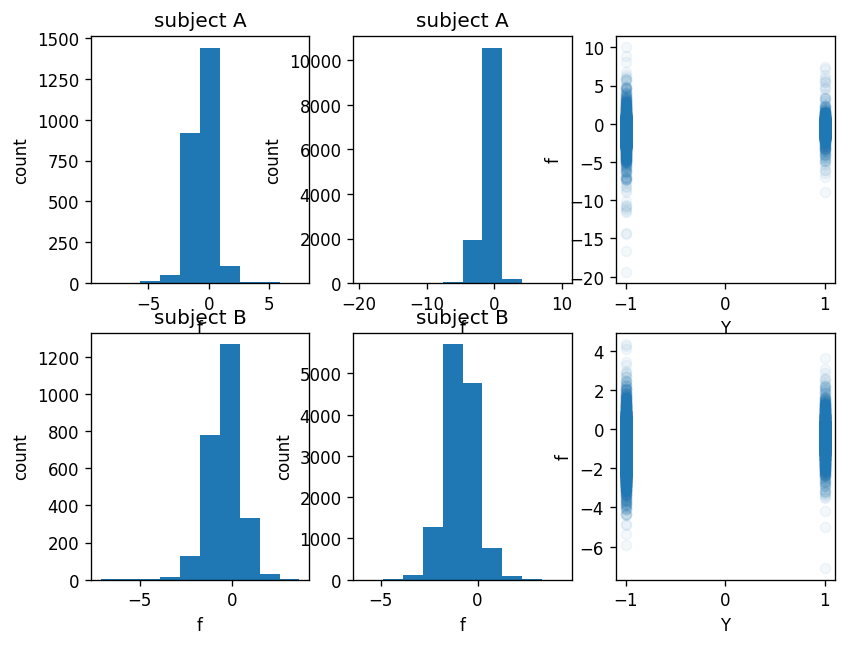

In [58]:
f=clf.decision_function(X_train)

f_A=clf.decision_function(X_train_A)
f_B=clf.decision_function(X_train_B)

plt.figure(figsize=(8, 6), dpi=120)
plt.subplot(231)
plt.hist(f_A[Y_train_A>0])
#plt.hist(f_A[Y_train_A<0])
plt.xlabel('f')
plt.ylabel('count')
plt.title('subject A')

plt.subplot(232)
plt.hist(f_A[Y_train_A<0])
plt.xlabel('f')
plt.ylabel('count')
plt.title('subject A')


plt.subplot(233)
plt.plot(Y_train_A, f_A, 'o', alpha=0.05)
plt.xlabel('Y')
plt.ylabel('f')



plt.subplot(234)
plt.hist(f_B[Y_train_B>0])
plt.xlabel('f')
plt.ylabel('count')
plt.title('subject B')

plt.subplot(235)
plt.hist(f_B[Y_train_B<0])
plt.xlabel('f')
plt.ylabel('count')
plt.title('subject B')


plt.subplot(236)
plt.plot(Y_train_B, f_B, 'o', alpha=0.05)
plt.xlabel('Y')
plt.ylabel('f')


In [6]:
# train logistic regression using f and Y
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(class_weight='balanced', n_jobs=-1)
clf2.fit(f_A.reshape(-1, 1), Y_train_A.reshape(-1, 1))


/Users/yyoo/tf11/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yyoo/tf11/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yyoo/tf11/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1296: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 24.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [7]:
clf2.score(f_A.reshape(-1, 1), Y_train_A.reshape(-1, 1))

0.604967320261438

In [8]:
Y_train_A

array([-1, -1, -1, ..., -1,  1, -1], dtype=int16)

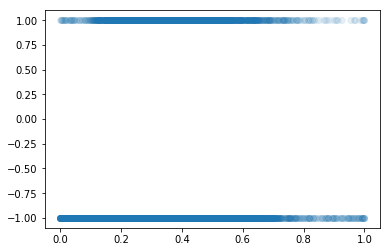

In [28]:
plt.plot(1/(1+np.exp(-f_A.reshape(-1,1))), Y_train_A, 'o', alpha=0.05)

In [39]:
from platt import platt 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


-0.5372311197490219 1.2346787392194398


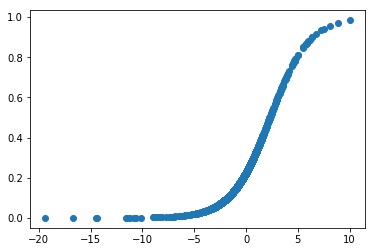

In [70]:
a, b = platt(f, Y_train, sum(Y_train<0), sum(Y_train>0))
print(a, b)

np.savetxt("AandB_SVM_ab.txt", (a,b))

plt.plot(f_A, 1.0/(1+np.exp(f_A*a+b)), 'o')


-0.40872524292744966 1.3031999827155483


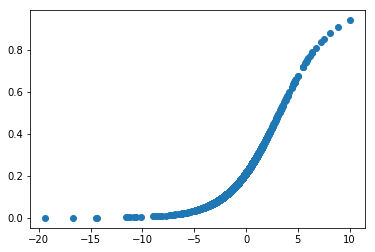

In [69]:
a, b = platt(f_A, Y_train_A, sum(Y_train_A<0), sum(Y_train_A>0))
print(a, b)

np.savetxt("A_SVM_ab.txt", (a,b))

plt.plot(f_A, 1.0/(1+np.exp(f_A*a+b)), 'o')




In [ ]:
sum(Y_train_A>0),sum(Y_train_A<0)

In [56]:
np.savetxt("f.txt", f_A)
np.savetxt("Y.txt", Y_train_A)